In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
cust_acq = pd.read_csv(r'C:\Users\parve\Downloads\Customer Acqusition.csv')

In [4]:
cust_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [5]:
cust_spend = pd.read_csv(r'C:\Users\parve\Downloads\spend.csv')

In [6]:
cust_spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [7]:
cust_spend = cust_spend.drop(['Sl No:'],axis=1)

In [8]:
cust_spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [9]:
cust_acq.Age = np.where(cust_acq.Age<18, round(cust_acq.Age.mean()),cust_acq.Age)

In [10]:
cust_acq.Age.head()

0    76
1    71
2    34
3    47
4    56
Name: Age, dtype: int64

In [11]:
#In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
cust_spend1 = pd.merge(left=cust_acq,right=cust_spend,on="Customer",how="inner")

In [12]:
cust_spend1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [13]:
# Find number of observations where Spend amount is > then customer limit.
cust_spend1.loc[cust_spend1["Amount"] > cust_spend1["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [15]:
cust_spend1.loc[cust_spend1["Amount"] > cust_spend1["Limit"],"Amount"] = (50 * cust_spend1["Limit"]/100)

In [16]:
cust_spend1.loc[cust_spend1["Amount"] > cust_spend1["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


In [19]:
#How many distinct customers exist?
distinct_cust = cust_acq.Customer.nunique()

In [20]:
distinct_cust

100

In [22]:
#How many distinct categories exist?
dist_cat = cust_acq.Segment.value_counts()

In [25]:
print(len(dist_cat),dist_cat)

5 Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64


In [26]:
#What is the average monthly spend by customers?
cust_spend.Month = pd.to_datetime(cust_spend.Month)
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [27]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))
cust_spend['Yearly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [28]:
cust_spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,2005-01-17,CAMERA,369694.07,Jan,2005


In [29]:
# Using groupby function average monthly spend by customers for respective years.
out1 = cust_spend.groupby(["Yearly","Monthly"]).mean()

In [30]:
print(round(out1,2))

                   Amount
Yearly Monthly           
2004   Apr      235272.04
       Feb      221215.27
       Jan      251712.07
       Mar      232146.12
       May      217539.24
       Nov      270486.40
       Sep      310923.38
2005   Apr      252181.33
       Aug      233734.63
       Dec      147503.06
       Feb      229802.28
       Jan      292741.37
       Jul      229116.66
       Jun      262688.11
       May      245696.52
       Nov      286143.32
       Oct      194568.64
       Sep      188666.20
2006   Apr      232468.97
       Aug      240699.72
       Dec      270470.98
       Feb      253858.26
       Jan      282058.01
       Jul      287505.10
       Jun      177252.39
       Mar      247166.08
       May      236162.74
       Nov      182841.29
       Oct      236136.34
       Sep      158520.09


In [31]:
#What are the top 5 product types?
top_products = cust_spend.Type.value_counts().head(5)
top_products

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [33]:
#Which city is having maximum spend?
city_spend = cust_spend1.groupby("City")["Amount"].sum()
print(city_spend.idxmax())

COCHIN


In [34]:
#Which age group is spending more money?
# New column "age_group" with 8 bins between 18 to 88 
cust_spend1["age_group"] =  pd.cut(cust_spend1["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)
cust_spend1.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,age_group
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82


In [40]:
age_spend = cust_spend1.groupby("age_group")["Amount"].sum()
print(age_spend.idxmax())

42-50


In [41]:
#Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
# Converting "Month" column to date time.
cust_spend1["Month"] = pd.to_datetime(cust_spend1["Month"])

In [42]:
# Creating new column "year" 
cust_spend1['Year'] = cust_spend1['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
cust_spend1.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,age_group,Year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004


In [43]:
out1 = pd.pivot_table(data = cust_spend1,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [44]:
out1

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

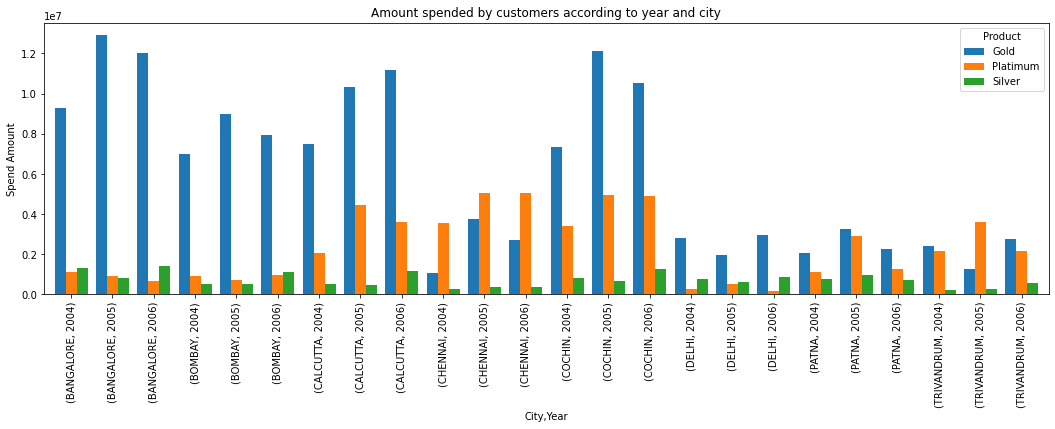

In [45]:
out1.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

In [46]:
#Monthly comparison of total spends, city wise.
# Creating column "Monthly" for graph 
cust_spend1['Monthly'] = cust_spend1['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [47]:
out1a = cust_spend1.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
out1a =pd.pivot_table(data=cust_spend1,values='Amount',index='City',columns='Monthly',aggfunc='sum')
out1a

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


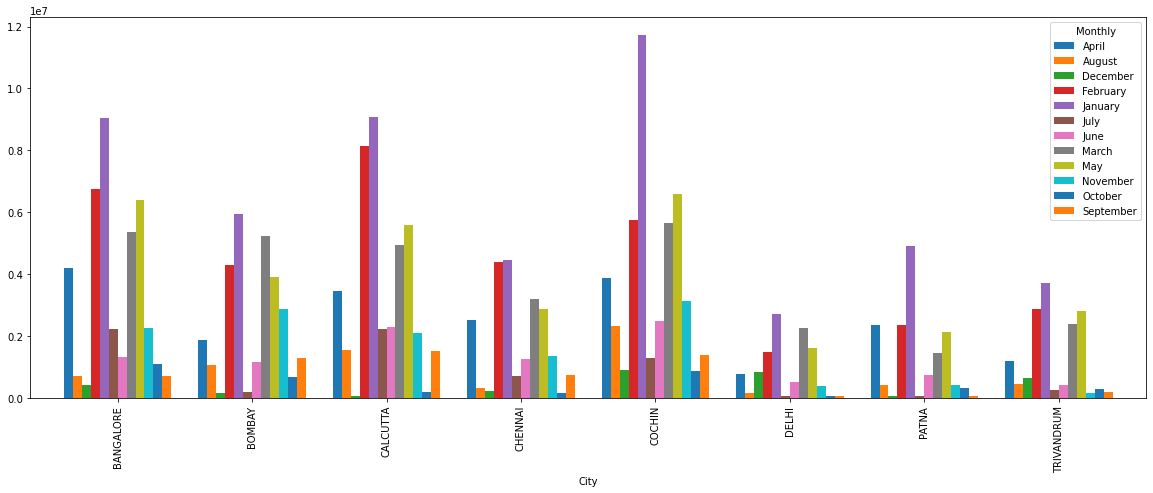

In [48]:
out1a.plot(kind="bar",figsize=(20,7),width=0.8)
plt.show()

In [49]:
#Comparison of yearly spend on air tickets.
spend_tickets = cust_spend1.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [50]:
spend_tickets

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [51]:
out1b = spend_tickets.loc[spend_tickets["Type"]=="AIR TICKET"]
out1b

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


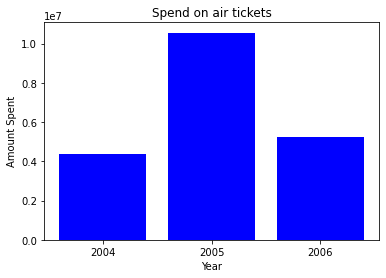

In [52]:
plt.bar(out1b["Year"],height=out1b["Amount"],color="blue")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Spend on air tickets")
plt.show()

In [54]:
#Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
out2a = pd.pivot_table(data=cust_spend1,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [55]:
out2a

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


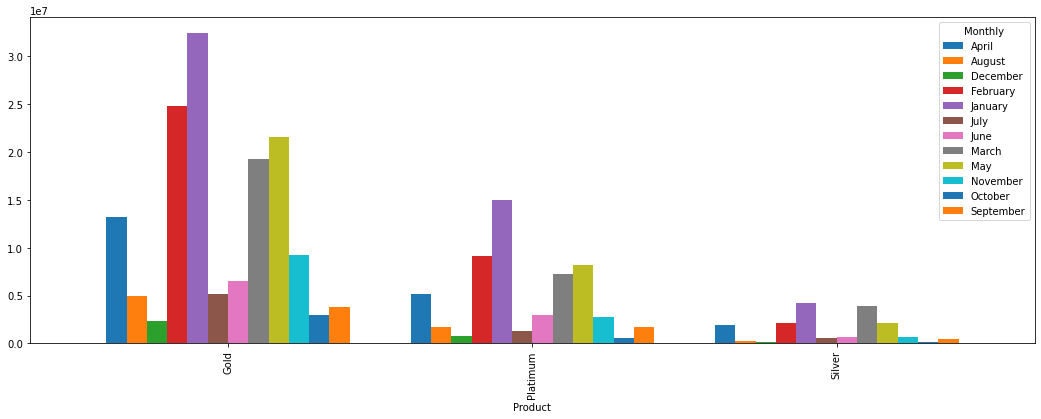

In [56]:
out2a.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()